In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import add_trading_hours


In [27]:
# Define parameters
asset_type = "stock"        # Example values: stock, etf, futures, crypto, index, fx
period = "full"             # Example values: full, month, week, day
timeframe = "1min"          # Example values: 1min, 5min, 30min, 1hour, 1day
adjustment = "adj_splitdiv"    # Example values: adj_split, adj_splitdiv, UNADJUSTED

#STOCK_DATA_DIR = "/home/ubuntu/ibis/data/frd-historical/stock/csv/1min/adj_splitdiv"
STOCK_DATA_DIR = f"/home/ubuntu/ibis/data/frd-historical/{asset_type}/csv/{timeframe}/{adjustment}"
os.listdir(STOCK_DATA_DIR)
ticker = 'RDFN'
stock_csv_filename = "_".join([ticker, period, timeframe, adjustment.replace("_", '')]) + ".txt"
fp = os.path.join(STOCK_DATA_DIR, ticker[0], stock_csv_filename)
print(stock_csv_filename)
print(fp)

RDFN_full_1min_adjsplitdiv.txt
/home/ubuntu/ibis/data/frd-historical/stock/csv/1min/adj_splitdiv/R/RDFN_full_1min_adjsplitdiv.txt


In [37]:
prices_df = pd.read_csv(
    fp,
    sep=",",
    names=['date', 'open', 'high', 'low', 'close', 'volume'],
    header=0,  # Assuming the first row is a header, if not set to None
    on_bad_lines='warn',  # Skip bad lines
    engine='python'  # Use the Python engine for more flexible error handling
)


# Convert 'date' column to datetime if it's not already
prices_df['date'] = pd.to_datetime(prices_df['date'])
print(prices_df.shape)

# Extract the day as YYYY-MM-DD
prices_df['day'] = prices_df['date'].dt.date
print(prices_df.shape)

# Extract the time as HH:MM:SS
prices_df['time'] = prices_df['date'].dt.time
print(prices_df.shape)

# Calculate the time ID (minute of the day from 1 to 1440)
prices_df['time_id'] = prices_df['date'].dt.hour * 60 + prices_df['date'].dt.minute + 1
print(prices_df.shape)

# set date as index
prices_df.set_index('date', inplace=True)

prices_df = add_trading_hours(prices_df)
print(prices_df.shape)

print(prices_df.info())
prices_df

(676378, 6)
(676378, 7)
(676378, 8)
(676378, 9)
(676378, 9)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 676378 entries, 2017-07-28 11:06:00 to 2024-07-19 19:55:00
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   open             676378 non-null  float64
 1   high             676378 non-null  float64
 2   low              676378 non-null  float64
 3   close            676378 non-null  float64
 4   volume           676378 non-null  int64  
 5   day              676378 non-null  object 
 6   time             676378 non-null  int64  
 7   time_id          676378 non-null  int32  
 8   is_trading_hour  676378 non-null  bool   
dtypes: bool(1), float64(4), int32(1), int64(2), object(1)
memory usage: 44.5+ MB
None


,open,high,low,close,volume,day,time,time_id,is_trading_hour
date,,,,,,,,,
2017-07-28 11:06:00,19.7100,20.0700,19.6300,19.9700,389751,2017-07-28,1106,667,True
2017-07-28 11:07:00,19.9800,20.3600,19.9200,20.0800,218754,2017-07-28,1107,668,True
2017-07-28 11:08:00,20.1500,20.6920,20.1250,20.6920,253592,2017-07-28,1108,669,True
2017-07-28 11:09:00,20.6800,20.9200,20.2200,20.4000,125916,2017-07-28,1109,670,True
2017-07-28 11:10:00,20.3400,20.4300,19.8000,19.9500,210876,2017-07-28,1110,671,True
...,...,...,...,...,...,...,...,...,...
2024-07-19 18:35:00,7.9200,7.9200,7.9200,7.9200,111,2024-07-19,1835,1116,False
2024-07-19 19:11:00,7.9200,7.9200,7.9200,7.9200,100,2024-07-19,1911,1152,False
2024-07-19 19:24:00,7.9191,7.9191,7.9191,7.9191,150,2024-07-19,1924,1165,False


In [41]:
prices_trading_df = prices_df[prices_df['is_trading_hour'] == 1].drop(columns=['is_trading_hour'])
print(prices_trading_df.shape)
prices_trading_df

(642990, 8)


,open,high,low,close,volume,day,time,time_id
date,,,,,,,,
2017-07-28 11:06:00,19.710,20.0700,19.630,19.9700,389751,2017-07-28,1106,667
2017-07-28 11:07:00,19.980,20.3600,19.920,20.0800,218754,2017-07-28,1107,668
2017-07-28 11:08:00,20.150,20.6920,20.125,20.6920,253592,2017-07-28,1108,669
2017-07-28 11:09:00,20.680,20.9200,20.220,20.4000,125916,2017-07-28,1109,670
2017-07-28 11:10:00,20.340,20.4300,19.800,19.9500,210876,2017-07-28,1110,671
...,...,...,...,...,...,...,...,...
2024-07-19 15:56:00,7.905,7.9100,7.900,7.9000,62836,2024-07-19,1556,957
2024-07-19 15:57:00,7.900,7.9100,7.900,7.9000,26656,2024-07-19,1557,958
2024-07-19 15:58:00,7.905,7.9190,7.900,7.9150,38478,2024-07-19,1558,959


In [62]:
start_date, end_date = "2018-01-01 00:00:00", "2018-12-31 23:59:59"
start_date, end_date = pd.to_datetime(start_date), pd.to_datetime(end_date)
prices_2016_df = prices_trading_df.loc[start_date:end_date]
print(prices_2016_df.info())
prices_2016_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86720 entries, 2018-01-02 09:30:00 to 2018-12-31 16:00:00
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   open     86720 non-null  float64
 1   high     86720 non-null  float64
 2   low      86720 non-null  float64
 3   close    86720 non-null  float64
 4   volume   86720 non-null  int64  
 5   day      86720 non-null  object 
 6   time     86720 non-null  int64  
 7   time_id  86720 non-null  int32  
dtypes: float64(4), int32(1), int64(2), object(1)
memory usage: 5.6+ MB
None


,open,high,low,close,volume,day,time,time_id
date,,,,,,,,
2018-01-02 09:30:00,31.410,31.500,31.030,31.030,12048,2018-01-02,930,571
2018-01-02 09:31:00,31.010,31.074,31.000,31.010,1864,2018-01-02,931,572
2018-01-02 09:32:00,30.953,30.953,30.930,30.930,1300,2018-01-02,932,573
2018-01-02 09:33:00,30.935,31.000,30.880,30.880,1992,2018-01-02,933,574
2018-01-02 09:34:00,30.917,30.950,30.890,30.945,9882,2018-01-02,934,575
...,...,...,...,...,...,...,...,...
2018-12-31 15:56:00,14.370,14.370,14.330,14.340,4243,2018-12-31,1556,957
2018-12-31 15:57:00,14.335,14.360,14.335,14.360,4735,2018-12-31,1557,958
2018-12-31 15:58:00,14.360,14.370,14.350,14.360,5472,2018-12-31,1558,959


2018-01-02
2018-01-03
2018-01-04
2018-01-05
2018-01-08
2018-01-09
2018-01-10
2018-01-11
2018-01-12
2018-01-16


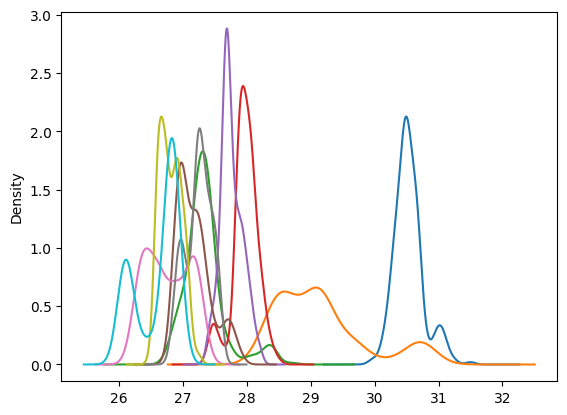

In [60]:
days = prices_2016_df['day'].unique()
day = days[0]
n_days = 10
# grid plot of kde for prices
fig, ax = plt.subplots()
for day in days[:n_days]:
    print(day)
    high_prices = prices_2016_df[prices_2016_df['day'] == day]['high']

    # plot kde for prices
    high_prices.plot.kde(ax=ax)
plt.show()


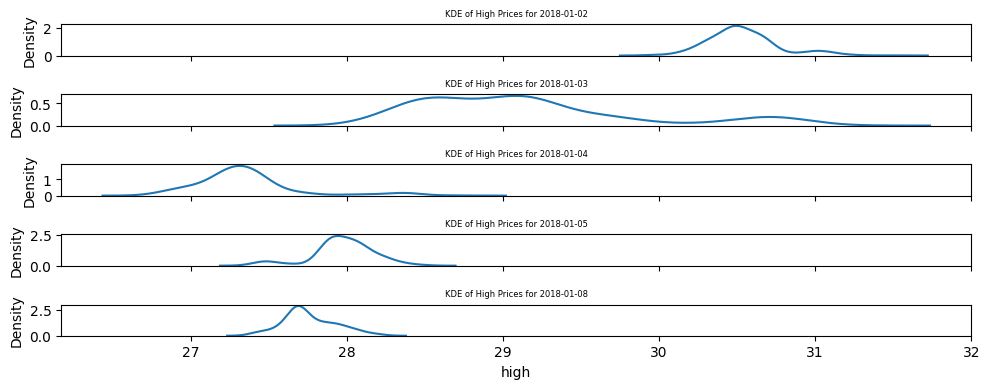

In [65]:
import seaborn as sns

# Assuming your dataframe is named `prices_2016_df` and is already loaded
n = 5  # Change this to the number of days you want to visualize

# Filter the dataframe for the first n days
filtered_df = prices_2016_df[prices_2016_df['day'].isin(days[:n])]

# Group the data by day
grouped = filtered_df.groupby('day')

# Create a figure with multiple subplots arranged vertically
fig, axs = plt.subplots(n, 1, figsize=(10, 4), sharex=True)

# Plot KDE for each day
for i, (day, group) in enumerate(grouped):
    sns.kdeplot(group['high'], ax=axs[i], fill=False)
    axs[i].set_title(f'KDE of High Prices for {day.strftime("%Y-%m-%d")}', fontsize=6)
    axs[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipykernel_7601/535923248.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_2016_df['day'] = pd.to_datetime(prices_2016_df['day'])


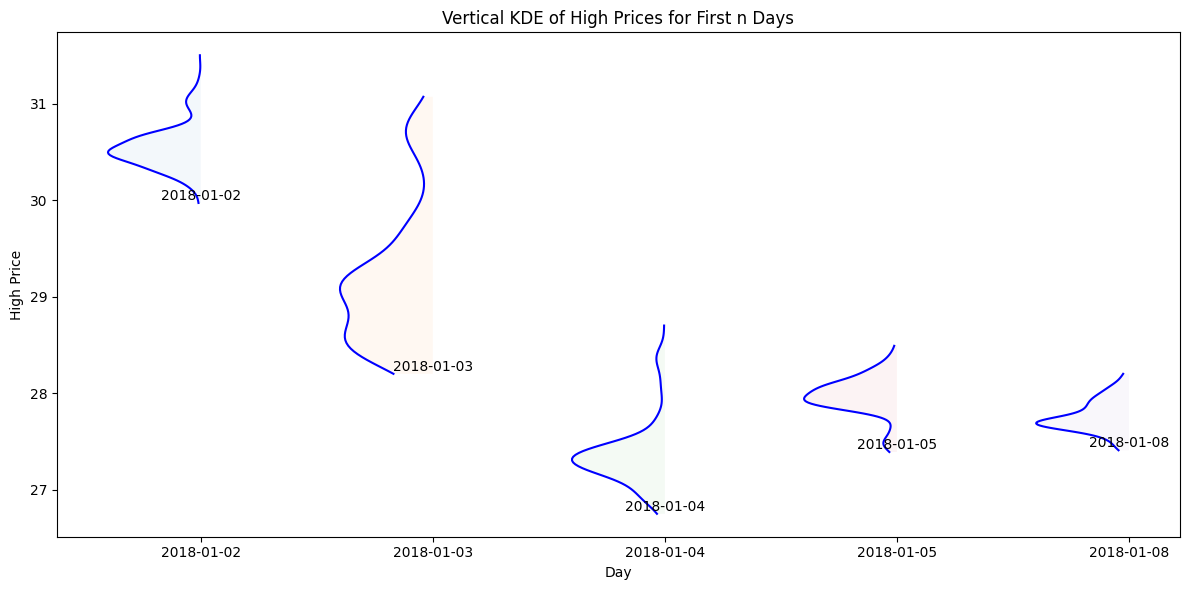

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# Sample data
# prices_2016_df = pd.read_csv('your_data.csv')

n = 5  # Number of days to visualize

# Convert the 'day' column to datetime for easy filtering
prices_2016_df['day'] = pd.to_datetime(prices_2016_df['day'])

# Get the unique days
unique_days = prices_2016_df['day'].unique()

# Filter the dataframe for the first n days
filtered_df = prices_2016_df[prices_2016_df['day'].isin(unique_days[:n])]

# Group the data by day
grouped = filtered_df.groupby('day')

# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Generate KDE for each day and plot them vertically
for i, (day, group) in enumerate(grouped):
    kde = gaussian_kde(group['high'])
    high_range = np.linspace(group['high'].min(), group['high'].max(), 100)
    kde_values = kde(high_range)
    
    # Normalize the KDE values to fit them into the plot
    kde_values = kde_values / kde_values.max() * 0.4  # Scale factor to fit the plot

    # Plot KDE vertically, rotated 90 degrees CCW
    ax.fill_betweenx(high_range, i, i - kde_values, alpha=0.05)
    ax.plot(i - kde_values, high_range, color='blue')
    
    # Label the x-axis with the day
    ax.text(i, high_range.min(), day.strftime('%Y-%m-%d'), ha='center', va='bottom')

# Set the x-ticks to be the day labels
ax.set_xticks(range(n))
ax.set_xticklabels([day.strftime('%Y-%m-%d') for day in unique_days[:n]])

# Set labels and title
ax.set_xlabel('Day')
ax.set_ylabel('High Price')
ax.set_title('Vertical KDE of High Prices for First n Days')

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipykernel_7601/3260448626.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_2016_df['day'] = pd.to_datetime(prices_2016_df['day'])


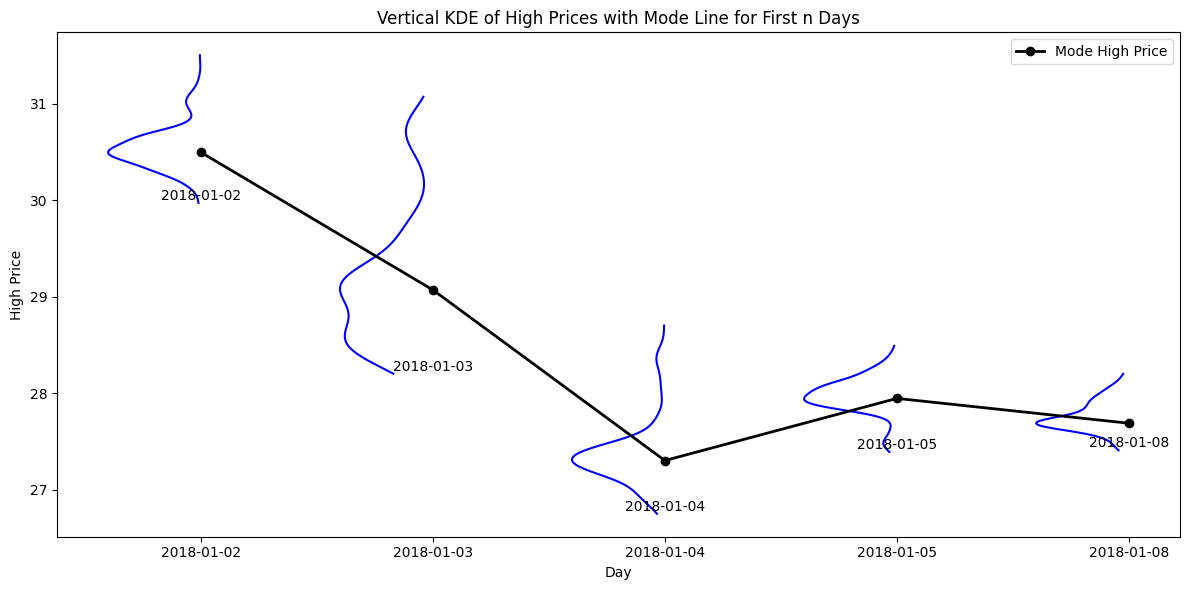

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# Sample data
# prices_2016_df = pd.read_csv('your_data.csv')

n = 5  # Number of days to visualize

# Convert the 'day' column to datetime for easy filtering
prices_2016_df['day'] = pd.to_datetime(prices_2016_df['day'])

# Get the unique days
unique_days = prices_2016_df['day'].unique()

# Filter the dataframe for the first n days
filtered_df = prices_2016_df[prices_2016_df['day'].isin(unique_days[:n])]

# Group the data by day
grouped = filtered_df.groupby('day')

# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# List to store the mode high prices
mode_highs = []

# Generate KDE for each day and plot them vertically
for i, (day, group) in enumerate(grouped):
    kde = gaussian_kde(group['high'])
    high_range = np.linspace(group['high'].min(), group['high'].max(), 100)
    kde_values = kde(high_range)
    
    # Find the mode (peak) of the KDE
    mode_high = high_range[np.argmax(kde_values)]
    mode_highs.append(mode_high)
    
    # Normalize the KDE values to fit them into the plot
    kde_values = kde_values / kde_values.max() * 0.4  # Scale factor to fit the plot

    # Plot KDE vertically, rotated 90 degrees CCW
    #ax.fill_betweenx(high_range, i, i - kde_values, alpha=0.5)
    ax.plot(i - kde_values, high_range, color='blue')
    
    # Label the x-axis with the day
    ax.text(i, high_range.min(), day.strftime('%Y-%m-%d'), ha='center', va='bottom')

# Plot the line chart through the mode high prices
ax.plot(range(n), mode_highs, color='black', marker='o', linestyle='-', linewidth=2, markersize=6, label='Mode High Price')

# Set the x-ticks to be the day labels
ax.set_xticks(range(n))
ax.set_xticklabels([day.strftime('%Y-%m-%d') for day in unique_days[:n]])

# Set labels and title
ax.set_xlabel('Day')
ax.set_ylabel('High Price')
ax.set_title('Vertical KDE of High Prices with Mode Line for First n Days')

# Add legend
ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipykernel_7601/355028616.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_2016_df['day'] = pd.to_datetime(prices_2016_df['day'])


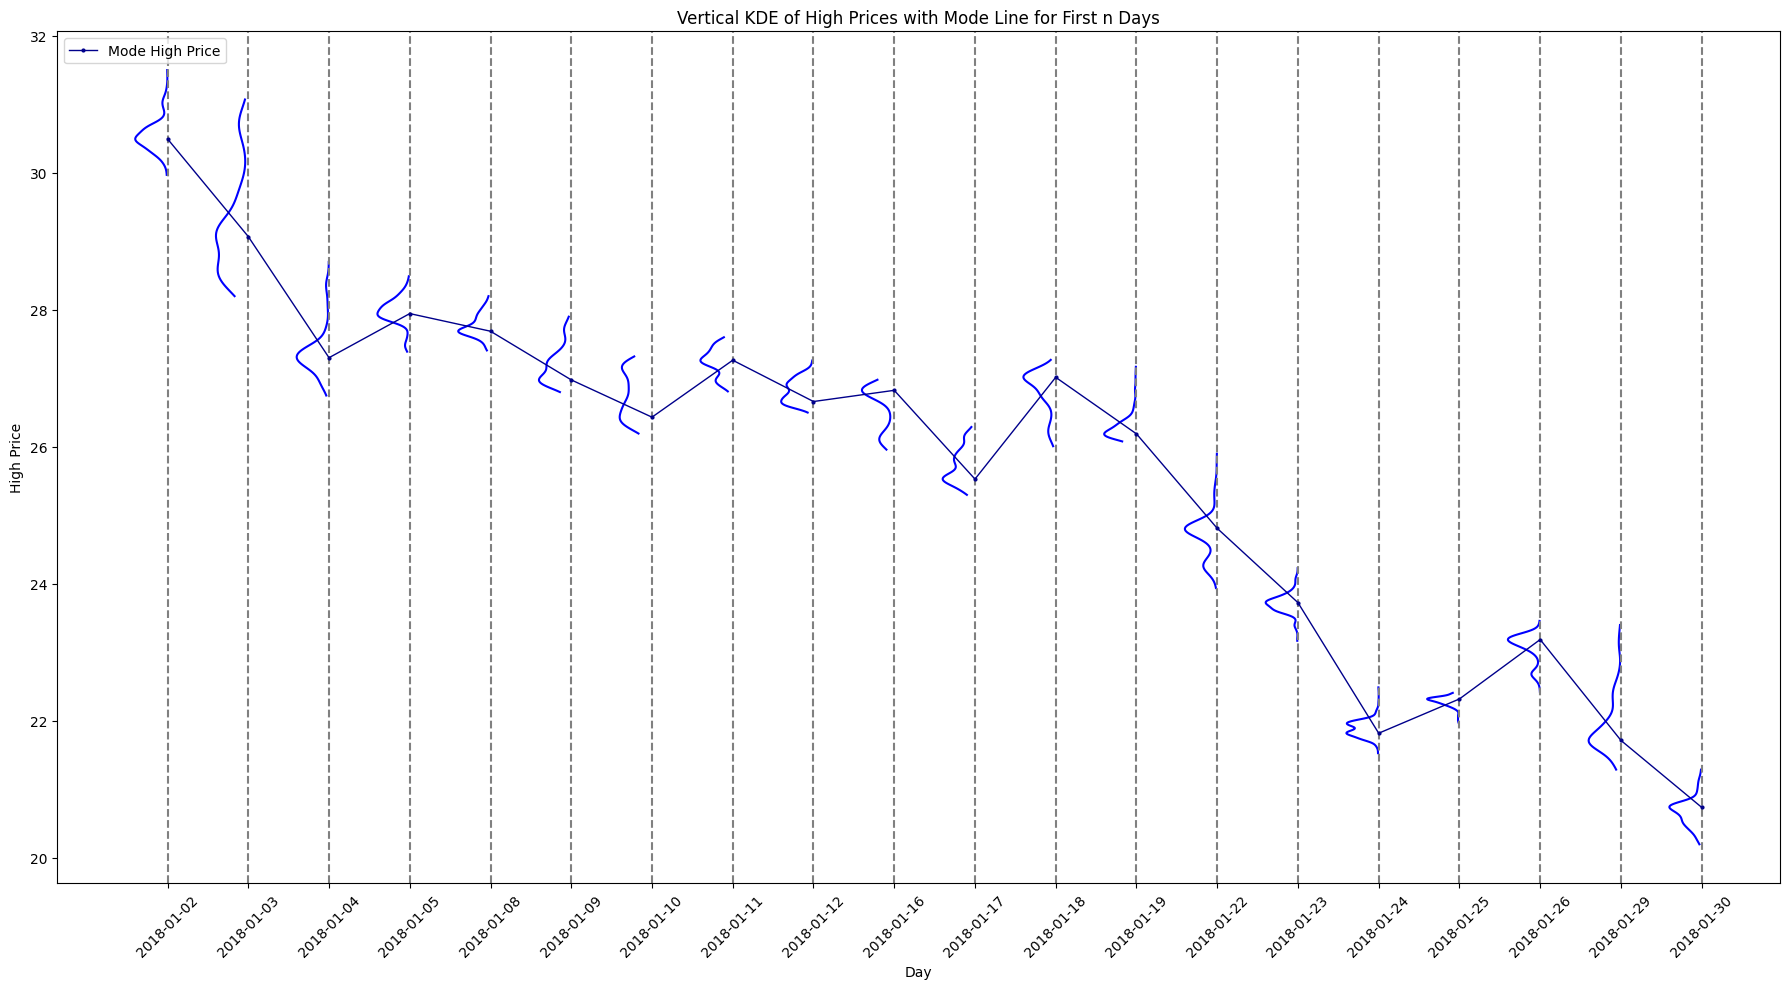

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# Sample data
# prices_2016_df = pd.read_csv('your_data.csv')

n = 20  # Number of days to visualize

# Convert the 'day' column to datetime for easy filtering
prices_2016_df['day'] = pd.to_datetime(prices_2016_df['day'])

# Get the unique days
unique_days = prices_2016_df['day'].unique()

# Filter the dataframe for the first n days
filtered_df = prices_2016_df[prices_2016_df['day'].isin(unique_days[:n])]

# Group the data by day
grouped = filtered_df.groupby('day')

# Create a figure
fig, ax = plt.subplots(figsize=(18, 10))

# List to store the mode high prices
mode_highs = []

# Generate KDE for each day and plot them vertically
for i, (day, group) in enumerate(grouped):
    kde = gaussian_kde(group['high'])
    high_range = np.linspace(group['high'].min(), group['high'].max(), 100)
    kde_values = kde(high_range)
    
    # Find the mode (peak) of the KDE
    mode_high = high_range[np.argmax(kde_values)]
    mode_highs.append(mode_high)
    
    # Normalize the KDE values to fit them into the plot
    kde_values = kde_values / kde_values.max() * 0.4  # Scale factor to fit the plot

    # Plot KDE vertically, rotated 90 degrees CCW
    #ax.fill_betweenx(high_range, i, i - kde_values, alpha=0.5)
    ax.plot(i - kde_values, high_range, color='blue')
    
    # Plot the mode high point accurately on the peak of the KDE
    #ax.plot(i, mode_high, 'ro', color='black')
    
    # Add a vertical line underneath each KDE graph
    a = mode_high - high_range.min()
    b = high_range.max() - high_range.min()
    ymax = a/b
    ymax = 1
    ax.axvline(x=i, ymin=0, ymax=ymax, color='grey', linestyle='--')

    # Label the x-axis with the day
    #ax.text(i, high_range.min(), day.strftime('%Y-%m-%d'), ha='center', va='bottom')

# Plot the line chart through the mode high prices
ax.plot(range(n), mode_highs, color='darkblue', marker='o', linestyle='-', linewidth=1, markersize=2, label='Mode High Price')

# Set the x-ticks to be the day labels
ax.set_xticks(range(n))
ax.set_xticklabels([day.strftime('%Y-%m-%d') for day in unique_days[:n]], rotation=45)

# Set labels and title
ax.set_xlabel('Day')
ax.set_ylabel('High Price')
ax.set_title('Vertical KDE of High Prices with Mode Line for First n Days')

# Add legend
ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


/tmp/ipykernel_7601/1596363654.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_2016_df['day'] = pd.to_datetime(prices_2016_df['day'])
/tmp/ipykernel_7601/1596363654.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(i, mode_low, 'ro', color='black')


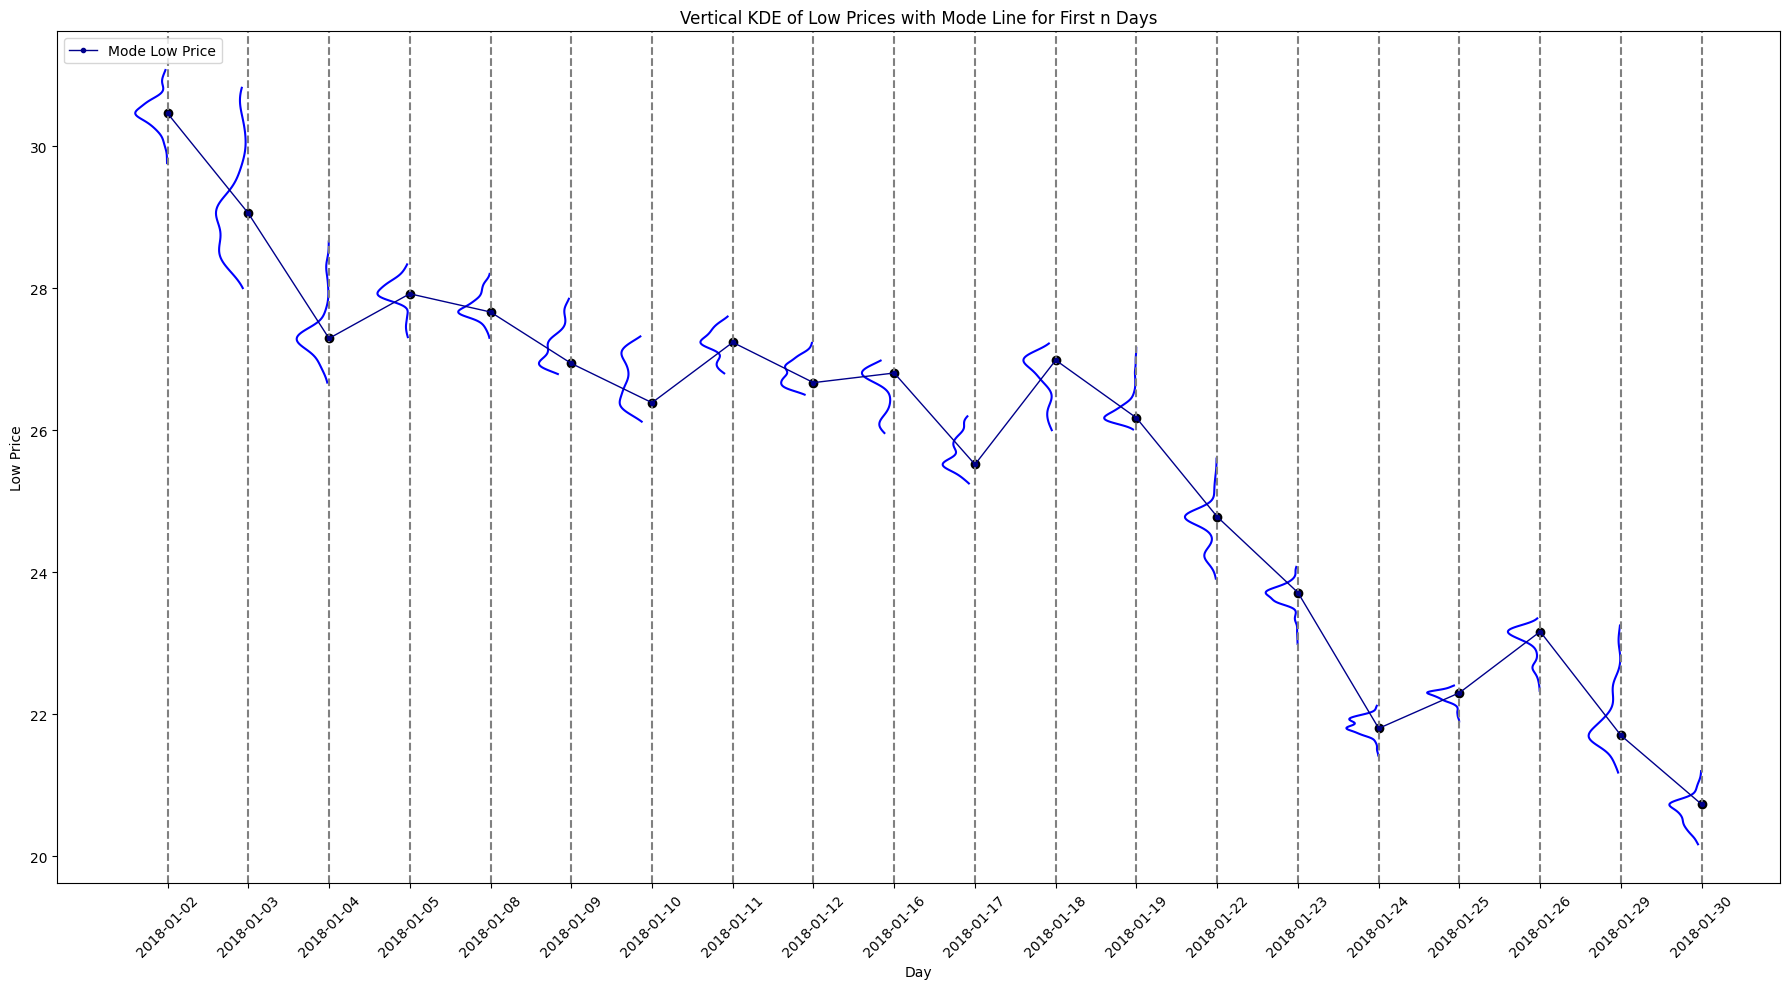

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Sample data
# prices_2016_df = pd.read_csv('your_data.csv')

n = 20  # Number of days to visualize

# Convert the 'day' column to datetime for easy filtering
prices_2016_df['day'] = pd.to_datetime(prices_2016_df['day'])

# Get the unique days
unique_days = prices_2016_df['day'].unique()

# Filter the dataframe for the first n days
filtered_df = prices_2016_df[prices_2016_df['day'].isin(unique_days[:n])]

# Group the data by day
grouped = filtered_df.groupby('day')

# Create a figure
fig, ax = plt.subplots(figsize=(18, 10))

# List to store the mode low prices
mode_lows = []

# Generate KDE for each day and plot them vertically
for i, (day, group) in enumerate(grouped):
    kde = gaussian_kde(group['low'])
    low_range = np.linspace(group['low'].min(), group['low'].max(), 100)
    kde_values = kde(low_range)
    
    # Find the mode (peak) of the KDE
    mode_low = low_range[np.argmax(kde_values)]
    mode_lows.append(mode_low)
    
    # Normalize the KDE values to fit them into the plot
    kde_values = kde_values / kde_values.max() * 0.4  # Scale factor to fit the plot

    # Plot KDE vertically, rotated 90 degrees CCW
    #ax.fill_betweenx(low_range, i, i - kde_values, alpha=0.5, color='blue')
    ax.plot(i - kde_values, low_range, color='blue')
    
    # Plot the mode low point accurately on the peak of the KDE
    ax.plot(i, mode_low, 'ro', color='black')
    
    # Add a vertical line underneath each KDE graph
    a = mode_low - low_range.min()
    b = low_range.max() - low_range.min()
    ymax = a / b
    ymax=1
    ax.axvline(x=i, ymin=0, ymax=ymax, color='grey', linestyle='--')

    # Label the x-axis with the day
    #ax.text(i, low_range.min(), day.strftime('%Y-%m-%d'), ha='center', va='bottom')

# Plot the line chart through the mode low prices
ax.plot(range(n), mode_lows, color='darkblue', marker='o', linestyle='-', linewidth=1, markersize=3, label='Mode Low Price')

# Set the x-ticks to be the day labels
ax.set_xticks(range(n))
ax.set_xticklabels([day.strftime('%Y-%m-%d') for day in unique_days[:n]], rotation=45)

# Set labels and title
ax.set_xlabel('Day')
ax.set_ylabel('Low Price')
ax.set_title('Vertical KDE of Low Prices with Mode Line for First n Days')

# Add legend
ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()
